In [1]:
import numpy as np
import elements
import matplotlib.pyplot as plt
%matplotlib inline


 36 Giga Pascals Max Stress
 61 Giga Pascals Max Stress
 92 Giga Pascals Max Stress
129 Giga Pascals Max Stress
170 Giga Pascals Max Stress
215 Giga Pascals Max Stress
265 Giga Pascals Max Stress
320 Giga Pascals Max Stress


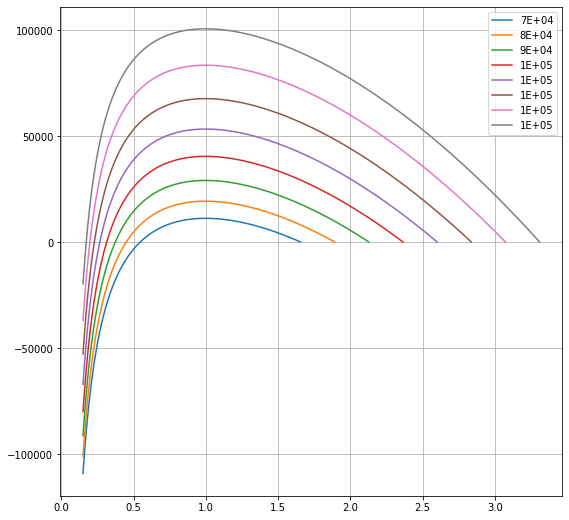

In [33]:
cb = elements.central_body()
unit_length = 10e3 # 10 km
cable_length = 150000e3

plt.figure(figsize=(9,9))
plt.grid()

for cable_length in np.arange(70000e3, 150000e3, 10000e3):
    # Theorize there are numerical percision errors at low altitudes
    phys_prop = elements.link_physical_properties(unit_length=unit_length, diamter=20, density=7900)
    lengths = np.arange(cable_length, 6378e3, -unit_length)
    lengths[-1] = 6378e3
    links = []

    for i, l in enumerate(lengths):
        links.append(elements.link(np.array([l -(unit_length/2),0,0],dtype=np.float64), central_body=cb, n=i, phys_prop=phys_prop))
        #print(np.array([l -(unit_length/2),0,0]))
    # plt.figure(figsize=(9,9))
    # plt.axis('equal')
    # th = np.linspace(0, 2 * np.pi)
    # plt.plot(6378 * np.cos(th), 6378 * np.sin(th), 'g-')
    # plt.plot(39000 * np.cos(th), 39000 * np.sin(th), 'r--')
    # plt.plot(36000 * np.cos(th), 36000 * np.sin(th), 'b--')
    # [plt.plot(link.pos_ECI[0] / 1000, link.pos_ECI[1] / 1000, 'k.') for link in links]
    # # for dt in [1] * 180:
    #     [link.propogate_motion(dt) for link in links]
    # [plt.plot(link.pos_ECI[0] / 1000, link.pos_ECI[1] / 1000, 'g.') for link in links]



    anchor = elements.space_anchor(np.array([cable_length,0,0],dtype=np.float64), central_body=cb, mass=0)
    anchor.calculate_tension()
    links.insert(0, anchor)
    tensions = [-1 * anchor.tension[0] / 1e9]
    radius = [np.linalg.norm(anchor.pos_ECI)/ 42300E3]
    for i, link in enumerate(links[1::]):
        link.calculate_tension(links[i].tension)
        tensions.append(-1 * link.tension[0] / 1e9)
        radius.append(np.linalg.norm(link.pos_ECI) / 42300E3)
    plt.plot(radius, tensions, '-', label=f'{cable_length/42300E3:1.0E}')
    plt.legend()


    print(f'{max(tensions) / phys_prop.cross_sectional_area:3.0f} Giga Pascals Max Stress')

In [ ]:
link.pos_ECI * phys_prop.mass / link.calculate_gravity_force(mass=link.phys_prop.mass)